### Improting necessary libraries 

In [76]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Using sql query (SELECT* FROM carbon_emission_data)  on snowflake then downloading this csv file to do analysis


In [78]:

data=pd.read_csv("C:/Users/hp/Downloads/dwh-carbon-emission.csv")
df=pd.DataFrame(data)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PERIOD       5000 non-null   int64  
 1   sectorId     5000 non-null   object 
 2   sector-name  5000 non-null   object 
 3   fuelId       5000 non-null   object 
 4   fuel-name    5000 non-null   object 
 5   stateId      5000 non-null   object 
 6   state-name   5000 non-null   object 
 7   VALUE        5000 non-null   float64
 8   value-units  5000 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 351.7+ KB


### Additional Transform
#### Filtring data for state_name United States with value 79845.023298 it seams that it is comulative sum of all other values
#### same for all fuels

In [85]:

df= df[df['state-name'] != 'United States']
df= df[df['fuel-name'] != 'All Fuels']

### Q1-What is the average co2 emission value for every state?


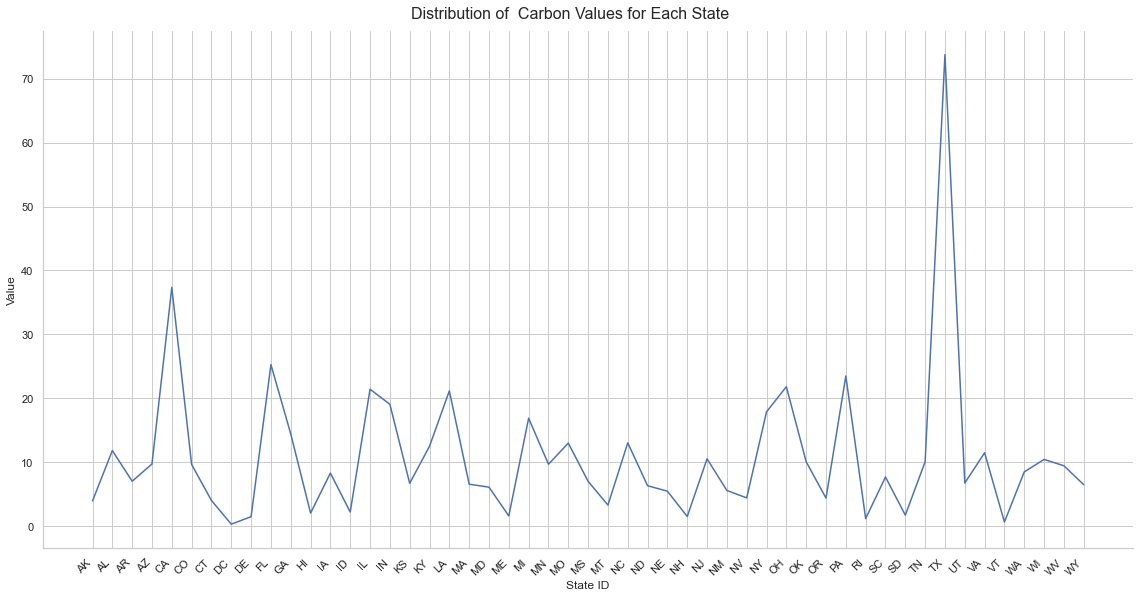

In [67]:
value_data=df.groupby("stateId")["VALUE"].mean().reset_index()
custom_palette = sns.color_palette("Set3")

g = sns.relplot(
    x='stateId',
    y='VALUE',
    kind='line',
    data=value_data,
    height=8,
    aspect=2,
    palette=custom_palette
)

g.set_axis_labels('State ID', 'Value')
g.fig.suptitle('Distribution of  Carbon Values for Each State', y=1.02, fontsize=16)

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=45, ha='right')

plt.show()


### Q2-What is the total value for each fuel type?

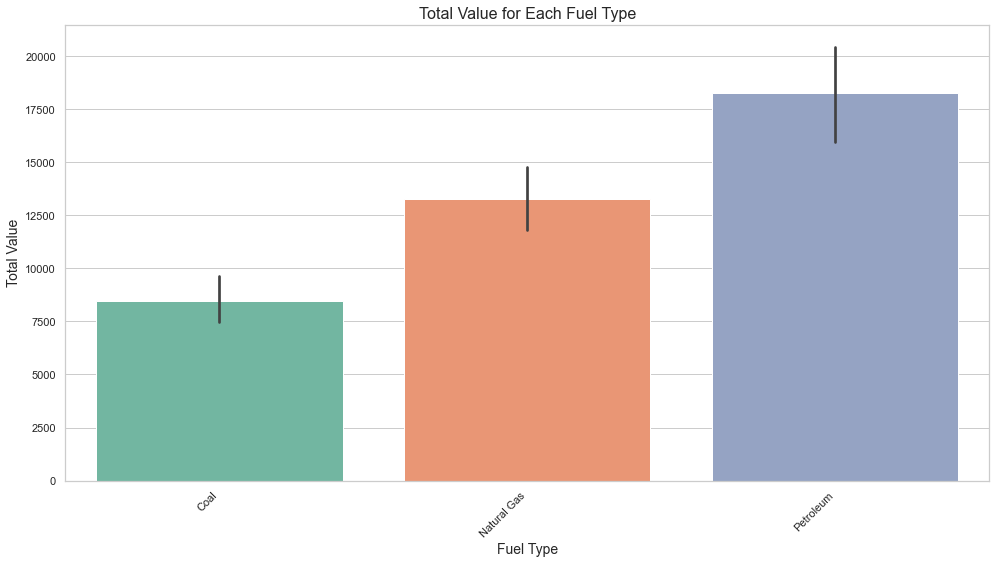

In [61]:

custom_palette = sns.color_palette("Set2")

plt.figure(figsize=(14, 8))
sns.barplot(x='fuel-name', y='VALUE', data=df, palette=custom_palette, estimator=sum)

plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Total Value', fontsize=14)
plt.title('Total Value for Each Fuel Type', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjusting the layout for better spacing
plt.tight_layout()

plt.show()







### Q3-Which state has the maximum total value across all sectors?

In [50]:
sectors = df['sector-name'].value_counts().reset_index()
sectors

,index,sector-name
0,Total carbon dioxide emissions from all sectors,820
1,Industrial carbon dioxide emissions,819
2,Residential carbon dioxide emissions,817
3,Electric Power carbon dioxide emissions,816
4,Transportation carbon dioxide emissions,816
5,Commercial carbon dioxide emissions,816


In [51]:
value_state = df.groupby('state-name')['VALUE'].sum().reset_index()
value_state

,state-name,VALUE
0,Alabama,1701.737135
1,Alaska,574.570171
2,Arizona,1399.334824
3,Arkansas,1010.535552
4,California,5378.903961
5,Colorado,1388.425793
6,Connecticut,577.457213
7,Delaware,212.117892
8,District of Columbia,42.341303
9,Florida,3638.747787


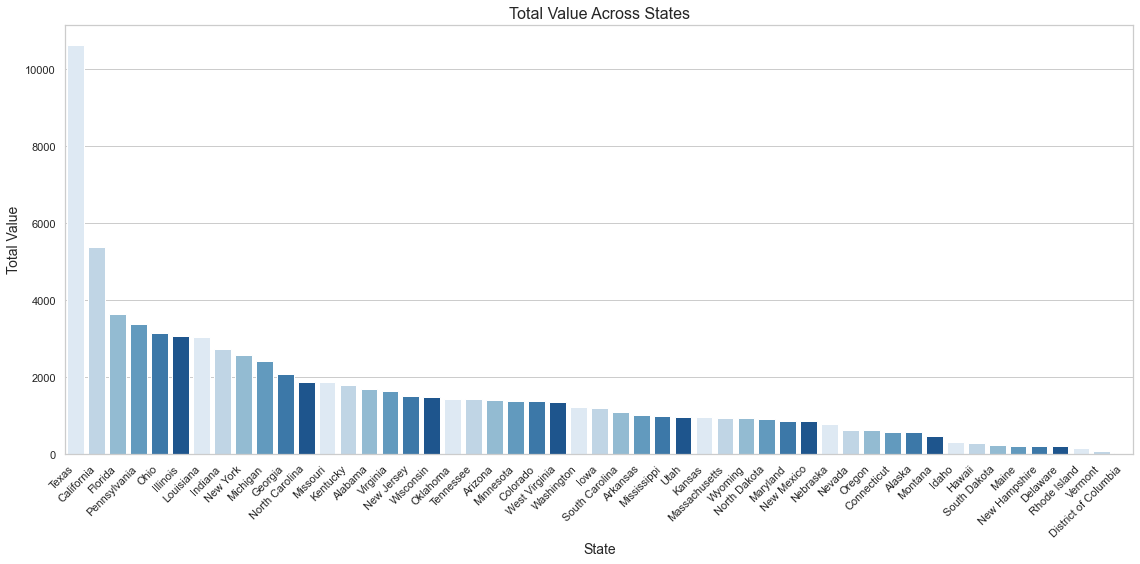

In [52]:
value_state_sorted = value_state.sort_values(by='VALUE', ascending=False)

custom_palette = sns.color_palette("Blues")

plt.figure(figsize=(16, 8))
sns.barplot(x='state-name', y='VALUE', data=value_state_sorted, palette=custom_palette)

plt.xlabel('State', fontsize=14)
plt.ylabel('Total Value', fontsize=14)
plt.title('Total Value Across States', fontsize=16)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()


### Q4-What is the distribution of values for a Residential carbon dioxide emissions?

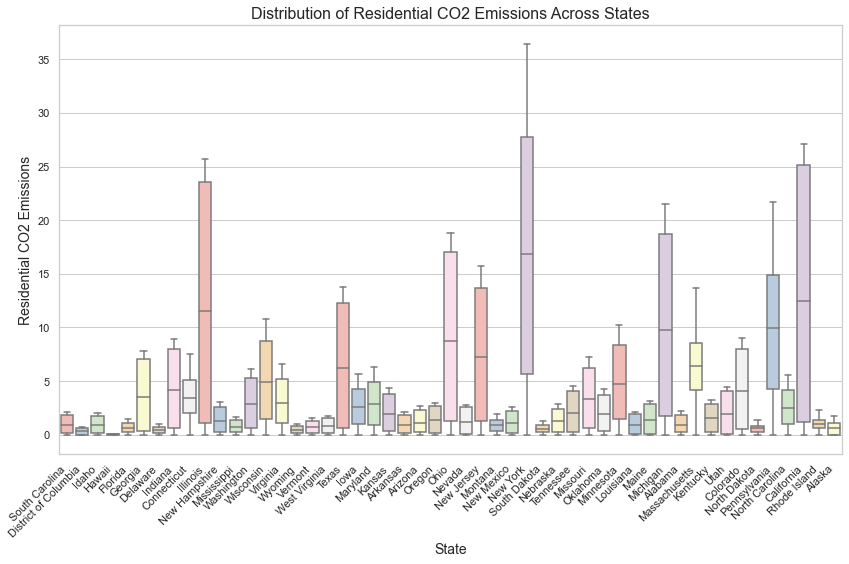

In [55]:


# Filter the data for Residential carbon dioxide emissions
residential_data = df[df['sector-name'] == 'Residential carbon dioxide emissions']

custom_palette = sns.color_palette("Pastel1")

plt.figure(figsize=(12, 8))
sns.boxplot(x='state-name', y='VALUE', data=residential_data, palette=custom_palette)  
plt.xlabel('State', fontsize=14)
plt.ylabel('Residential CO2 Emissions', fontsize=14)
plt.title('Distribution of Residential CO2 Emissions Across States', fontsize=16)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()


### Q5-Which fuel type is most commonly used in New york?

In [62]:


# Filter the data 
texas_data = df[df['state-name'] == 'New York']

# Group by 'fuel-name' and calculate the sum of values
fuel_usage_in_texas = texas_data.groupby('fuel-name')['VALUE'].sum().reset_index()

# Find the fuel type with the highest sum of values
most_common_fuel_in_texas = fuel_usage_in_texas.loc[fuel_usage_in_texas['VALUE'].idxmax()]

# Display the most common fuel type 
print("The most commonly used fuel type in New York is:", most_common_fuel_in_texas['fuel-name'])


The most commonly used fuel type in New York is: Petroleum


### Q6-What is the average value for each fuel type in all sectors?

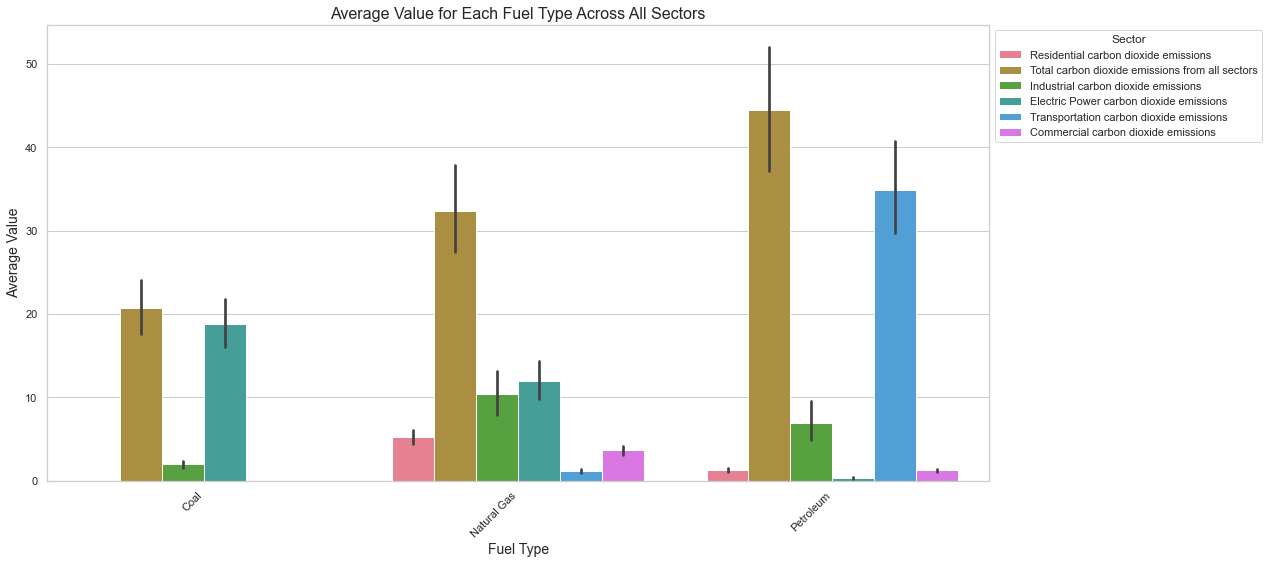

In [71]:

custom_palette = sns.color_palette("husl")

plt.figure(figsize=(14, 8))
sns.barplot(x='fuel-name', y='VALUE', hue='sector-name', data=df, palette=custom_palette)

plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.title('Average Value for Each Fuel Type Across All Sectors', fontsize=16)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()


plt.legend(title='Sector', title_fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


### Q7-Is there a correlation between the 'VALUE' and 'PERIOD' columns?

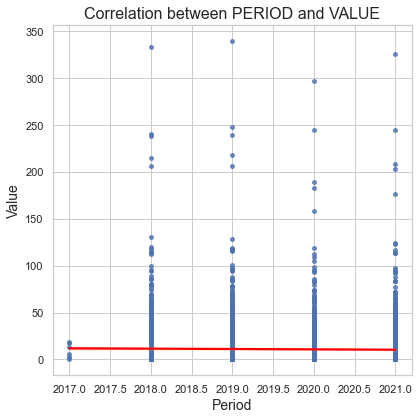

In [75]:

plt.figure(figsize=(6, 6))
sns.regplot(x='PERIOD', y='VALUE', data=df, scatter_kws={'s': 15}, line_kws={'color': 'red'})

plt.xlabel('Period', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Correlation between PERIOD and VALUE', fontsize=16)

plt.tight_layout()

plt.show()
